### Import and cleanse

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline 

In [3]:
#read train data into python
train = pd.read_csv('./train.csv')

In [6]:
#look at head
train.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   1       2596      51      3                               258   
1   2       2590      56      2                               212   
2   3       2804     139      9                               268   
3   4       2785     155     18                               242   
4   5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm     ...      Soil_Type32  \
0            221             232            148     ...                0   
1            220             235            151     ...                0   
2            234             238            135     ...                0   
3            238             238            122     ...                0   
4            220             234            150     ...                0   

   Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
0            0            0            0           5  
1            0            0            0           5  
2            0            0            0           2  
3            0            0            0           2  
4            0            0            0           5  

[5 rows x 56 columns]

In [7]:
#get info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
Id                                    15120 non-null int64
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null int64
Wilderness_Area2                      15120 non-null int64
Wilderness_Area3                      15120 non-null int64
Wilderness_Area4                      15120 non-null int64
Soil_T

#### Very clean data, no nulls anywhere

In [13]:
#check if there are any duplicate IDs
dup = train.duplicated('Id')
if len(dup[dup != 0]) == 0:
    print('no duplicates')
else: 
    print('duplicates')

no duplicates


### EDA

In [4]:
#group the factors into binary and non-binary groups
nb_cols = list(train.iloc[:,1:11].columns) #don't include Id
b_cols = list(train.iloc[:,11:len(train.columns)-1].columns) #don't include cover type

In [29]:
#describe the non-binary columns
train[nb_cols].describe()

Elevation        Aspect         Slope  \
count  15120.000000  15120.000000  15120.000000   
mean    2749.322553    156.676653     16.501587   
std      417.678187    110.085801      8.453927   
min     1863.000000      0.000000      0.000000   
25%     2376.000000     65.000000     10.000000   
50%     2752.000000    126.000000     15.000000   
75%     3104.000000    261.000000     22.000000   
max     3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          330.000000                       79.000000   
max                         1343.000000                      554.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                       1714.023214     212.704299      218.965608   
std                        1325.066358      30.561287       22.801966   
min                           0.000000       0.000000       99.000000   
25%                         764.000000     196.000000      207.000000   
50%                        1316.000000     220.000000      223.000000   
75%                        2270.000000     235.000000      235.000000   
max                        6890.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  
count   15120.000000                        15120.000000  
mean      135.091997                         1511.147288  
std        45.895189                         1099.936493  
min         0.000000                            0.000000  
25%       106.000000                          730.000000  
50%       138.000000                         1256.000000  
75%       167.000000                         1988.250000  
max       248.000000                         6993.000000

In [ ]:
#bar charts/dists
#produce a histogram for each nb_col
#box plots

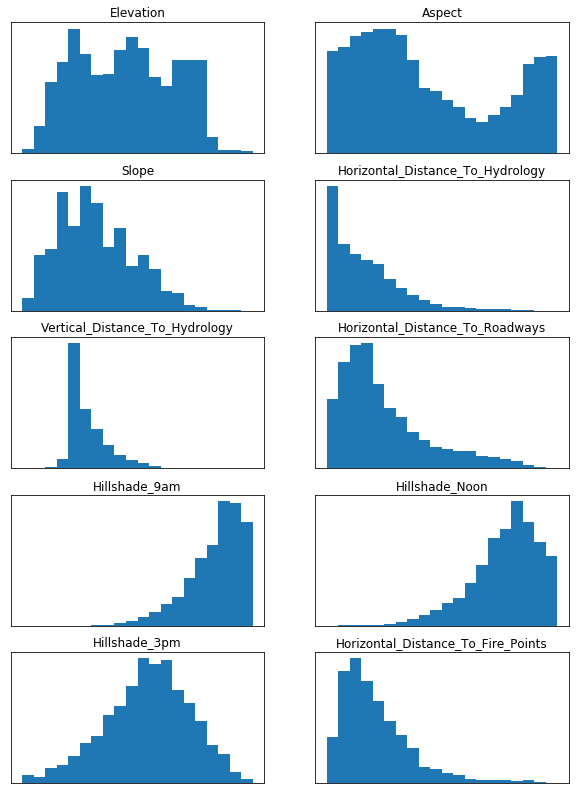

In [14]:
#create histogram of every non-binary column
counter = 1
fig = plt.figure(figsize=(10, 14))
bins = 20
for col in nb_cols:
    sub = plt.subplot(5, 2, counter)
    plt.hist(x = train[col], bins=bins)
    plt.title(nb_cols[counter-1])
    sub.set_xticks(())
    sub.set_yticks(())
    counter+=1

plt.show()

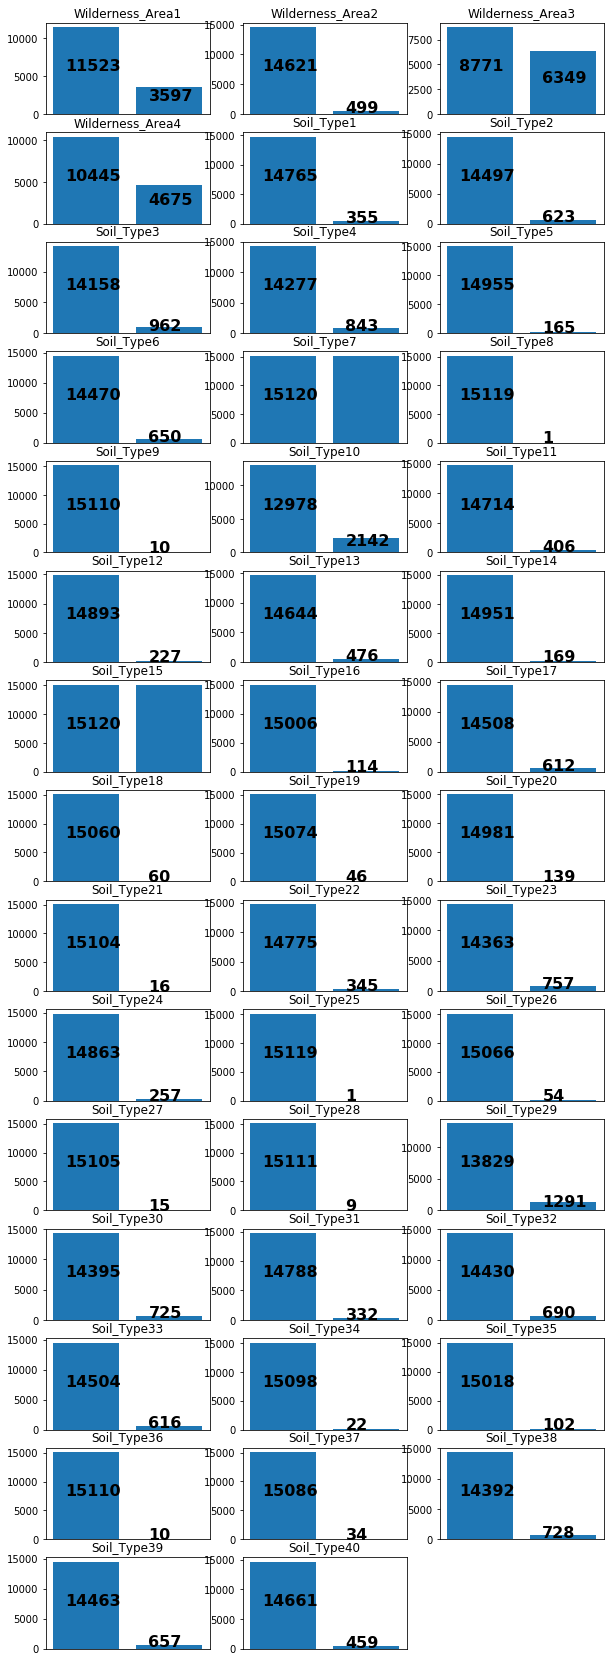

In [48]:
#create bar chart for each of the binary columns
counter = 1
fig = plt.figure(figsize=(10, 40))
for col in b_cols:
    val_counts = train[b_cols[counter-1]].value_counts()
    sub = plt.subplot(20, 3, counter)
    plt.bar(x=[0,1],height=val_counts)
    plt.title(b_cols[counter-1])
    for i, v in enumerate(val_counts):
        sub.text(x=i-0.25, y=v/2, s=str(v), color='black', fontweight='bold', fontsize=16)
    sub.set_xticks(())
    #sub.set_yticks(())
    counter+=1

plt.show()